Here's an extensive summary in markdown format, drawing on the provided sources and our conversation history:

**Embedding Models**

*   **Core Function:** Embedding models are used to transform text into numerical vector representations, effectively capturing the semantic meaning of the text. These numerical representations, known as "embeddings", enable machines to understand and compare text with speed and accuracy.
*   **Key Concepts**:
    *   **Text as Vectors:** Text is converted into numerical vectors.
    *   **Similarity Measurement:** These vectors can be compared using mathematical operations to determine how similar the texts are.
*   **Historical Context**:
    *   **BERT** (Bidirectional Encoder Representations from Transformers) was a pivotal advancement, applying transformer models to embed text.
    *  **SBERT** (Sentence-BERT) was developed to generate semantically rich sentence embeddings, which can be compared using similarity metrics like cosine similarity.
*   **LangChain Interface**: LangChain provides a universal interface for working with various embedding models, including two primary methods:
    *   `embed_documents`: Embeds multiple texts (documents).
    *   `embed_query`: Embeds a single text (query).
*   **Similarity Metrics**: These metrics are used to compare the embedding vectors.
    *   **Cosine Similarity**: Measures the cosine of the angle between two vectors.
    *   **Euclidean Distance**: Measures the straight-line distance between two points.
    *   **Dot Product**: Measures the projection of one vector onto another.
    *  The choice of metric depends on the model; for example, **OpenAI suggests cosine similarity for their embeddings**.
*   **Practical Example**: The following code demonstrates how to use LangChain's `embed_documents` method with the OpenAI embeddings model:

    ```python
    from langchain_openai import OpenAIEmbeddings
    embeddings_model = OpenAIEmbeddings()
    embeddings = embeddings_model.embed_documents(
    [
    "Hi there!",
    "Oh, hello!",
    "What's your name?",
    "My friends call me World",
    "Hello World!"
    ]
    )
    len(embeddings), len(embeddings)
    # Output: (5, 1536)
    ```

**Text Splitters**

*   **Purpose:** Document splitting is a crucial preprocessing step that divides large texts into smaller, more manageable chunks [previous turn]. This process is essential for ensuring consistent processing, overcoming model input size limits, and improving text representation quality [previous turn].
*  **Key Concepts:** Text splitters break down documents into smaller chunks that are more suitable for downstream applications [previous turn].
*   **Reasons for Splitting**:
    *   **Handling non-uniform document lengths** [previous turn].
    *   **Overcoming model input limitations** [previous turn].
    *  **Improving representation quality** by focusing on smaller, more specific sections of text [previous turn].
    *   **Enhancing retrieval precision** by allowing more precise matching of queries to relevant sections [previous turn].
    *   **Optimising computational resources** [previous turn].
*   **Approaches**:
    *   **Length-based**: Splits documents based on their length [previous turn].
        *   **Token-based**: Splits based on the number of tokens [previous turn].
        *   **Character-based**: Splits based on the number of characters [previous turn].
    *   **Text-structured based**: Splits documents based on their natural hierarchical structure (paragraphs, sentences, words) [previous turn].
        *   LangChain's `RecursiveCharacterTextSplitter` is an example [previous turn].
    *   **Document-structured based**: Splits documents based on their inherent structure (HTML, Markdown, JSON, code) [previous turn].
        *   Examples include splitting Markdown by headers, HTML by tags, and JSON by objects or arrays [previous turn].
    *   **Semantic meaning based**: Splits text when there are significant changes in meaning, using techniques such as comparing embeddings of sliding windows of text [previous turn].
*   **Example of Length-Based Splitting**: This is based on information from our previous turn [previous turn]:
    ```python
    from langchain_text_splitters import CharacterTextSplitter
    text_splitter = CharacterTextSplitter.from_tiktoken_encoder(
    encoding_name = "cl100k_base", chunk_size = 100, chunk_overlap = 0
    )
    texts = text_splitter.split_text(document)
    ```
*   **Example of Text-Structured Splitting**: This is based on information from our previous turn [previous turn]:
      ```python
    from langchain_text_splitters import RecursiveCharacterTextSplitter
    text_splitter = RecursiveCharacterTextSplitter(chunk_size = 100, chunk_overlap = 0)
    texts = text_splitter.split_text(document)
     ```

**Summary of Previous Conversational Turns**

*   **Document Loaders**: LangChain provides a unified way to load data from various sources using a consistent interface [previous turn]. They offer methods such as `.load()` and `.lazy_load()` and have many integration options [previous turn].
*  **Retrieval Systems:** These are designed to efficiently identify relevant information. They often use natural language interfaces, and they perform query analysis to optimise retrieval [previous turn]. Common retrieval systems are lexical search indexes, vector indexes, relational databases, and graph databases [previous turn]. LangChain provides a unified interface through the retriever concept to work with these systems [previous turn].

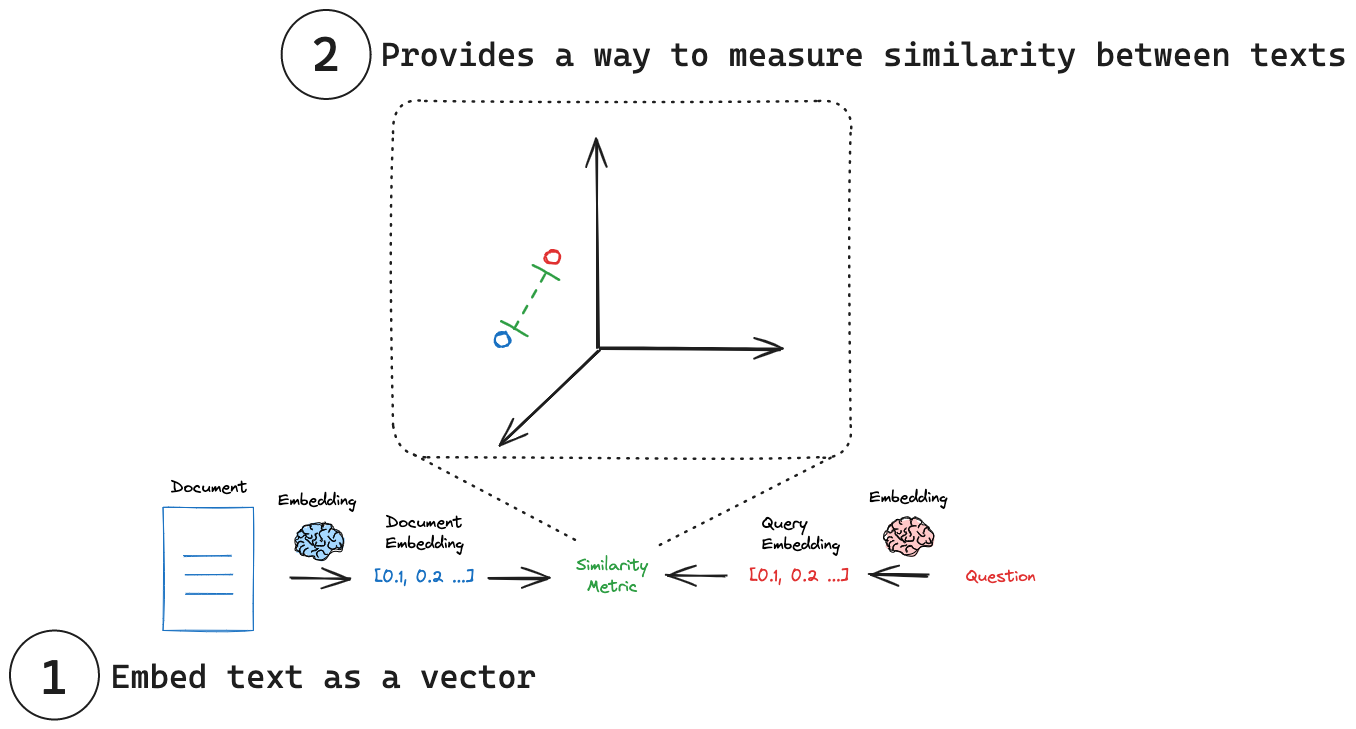


In [2]:
from langchain_ollama import OllamaEmbeddings
embeddings_model = OllamaEmbeddings(model="snowflake-arctic-embed2")
embeddings = embeddings_model.embed_documents(
    [
        "Hi there!",
        "Oh, hello!",
        "What's your name?",
        "My friends call me World",
        "Hello World!"
    ]
)
len(embeddings), len(embeddings[0])

(5, 1024)

In [4]:
embeddings[0][:10]

[0.004418998,
 0.025307013,
 -0.07974377,
 -0.0513972,
 -0.014522085,
 -0.010094967,
 -0.007408518,
 0.045579445,
 -0.006835301,
 -0.013286111]

In [5]:
from langchain_ollama import OllamaEmbeddings
embeddings_model = OllamaEmbeddings(model="llama3.1")
embeddings = embeddings_model.embed_documents(
    [
        "Hi there!",
        "Oh, hello!",
        "What's your name?",
        "My friends call me World",
        "Hello World!"
    ]
)
len(embeddings), len(embeddings[0])

(5, 4096)

In [6]:
embeddings[0][:10]

[-0.011962632,
 -0.011079769,
 -0.009850593,
 -0.008637095,
 -0.028328931,
 -0.008373369,
 -0.014679323,
 0.0150336595,
 -0.0018961291,
 0.0009887553]

In [18]:
embeddings_model = OllamaEmbeddings(model="snowflake-arctic-embed2")

query_embedding = embeddings_model.embed_query("What is the meaning of life?")

query_embedding[:5]

[0.00019478773, -0.03586269, -0.022517396, -0.027284008, -0.045650296]

In [19]:
embeddings = embeddings_model.embed_documents(
    [
        "The meaning of life is to find a place where you are happy",
    ]
)

embeddings[0][:5]

[-0.013148064, -0.05916847, -0.026864368, -0.032836284, -0.037431225]

In [20]:
import numpy as np

def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

similarity = cosine_similarity(query_embedding, embeddings[0])
print("Cosine Similarity:", similarity)

Cosine Similarity: 0.7891017234447446


In [21]:
embeddings = embeddings_model.embed_documents(
    [
        "My friends call me World",
    ]
)

embeddings[0][:5]

similarity = cosine_similarity(query_embedding, embeddings[0])
print("Cosine Similarity:", similarity)

Cosine Similarity: 0.3747816948094577
